In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import re
!pip install plotly

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import math


In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

df.head(10)


Saving Defensive Stats - Headings Gone - Sheet1.csv to Defensive Stats - Headings Gone - Sheet1 (3).csv


,Name,Age,MP,dPG%,dSG%,dSF%,dPF%,dC%,VR,MD,DEFL,FREQ,LT_06_%,PM,raDRDB,raDTOV
0,DeMar DeRozanCHI | SF,34,2989,7.9,19.6,39.2,25.2,8.1,28.0,70.0,1.7,40.5,61.5,-1.6,-0.28,-0.46
1,Domantas SabonisSAC | C,27,2928,5.5,8.3,7.0,16.2,62.9,3.0,87.0,2.0,44.2,58.5,-5.6,1.36,0.23
2,Coby WhiteCHI | PG,24,2881,28.2,33.2,22.4,10.3,5.9,40.0,87.0,1.1,34.1,70.5,7.5,0.78,-0.47
3,Mikal BridgesBKN | SF,27,2854,27.9,26.4,23.5,12.5,9.7,79.0,97.0,1.6,38.7,60.9,-1.7,-0.38,0.26
4,Paolo BancheroORL | PF,21,2799,8.7,12.6,27.5,37.2,14.1,38.0,78.0,1.4,43.6,60.2,-3.5,-0.45,0.61
5,Kevin DurantPHX | PF,35,2791,9.4,15.3,27.9,32.1,15.3,68.0,85.0,1.5,36.1,58.4,-5.2,1.88,-0.76
6,Dejounte MurrayATL | PG,27,2783,34.9,28.1,18.2,10.3,8.4,43.0,100.0,3.0,44.8,65.0,1.9,0.43,0.34
7,Anthony EdwardsMIN | SG,22,2770,16.4,25.8,29.2,22.0,6.5,74.0,80.0,2.1,33.3,58.9,-4.0,-0.57,0.53
8,Nikola JokicDEN | C,28,2737,6.7,7.1,7.5,16.5,62.3,4.0,73.0,3.1,42.1,64.6,0.2,2.68,-0.35
9,Jalen BrunsonNYK | PG,27,2726,33.3,28.3,21.5,10.5,6.4,42.0,70.0,1.5,36.0,67.8,4.6,-0.21,-0.30


In [ ]:
print("Initial Data Types:\n", df.dtypes)

df[['dPG%', 'dSG%', 'dSF%', 'dPF%', 'dC%']] = df[['dPG%', 'dSG%', 'dSF%', 'dPF%', 'dC%']].apply(pd.to_numeric, errors='coerce')

print("\nData Types After Conversion:\n", df.dtypes)

print("\nCheck for NaN Values:\n", df[['dPG%', 'dSG%', 'dSF%', 'dPF%', 'dC%']].isna().sum())

def calculate_dvi(row):
    proportions = [row['dPG%'] / 100, row['dSG%'] / 100, row['dSF%'] / 100, row['dPF%'] / 100, row['dC%'] / 100]
    dvi = -sum([p * math.log(p) for p in proportions if p > 0])
    return dvi*100

df['DVI'] = df.apply(calculate_dvi, axis=1)

df_sorted = df.sort_values(by='DVI', ascending=False)
df_sorted
df_filtered = df_sorted[df['MP'] >= 1500]


Initial Data Types:
 Name        object
Age          int64
MP           int64
dPG%       float64
dSG%       float64
dSF%       float64
dPF%       float64
dC%        float64
VR         float64
MD         float64
DEFL       float64
FREQ       float64
LT_06_%    float64
PM         float64
raDRDB     float64
raDTOV     float64
DVI        float64
dtype: object

Data Types After Conversion:
 Name        object
Age          int64
MP           int64
dPG%       float64
dSG%       float64
dSF%       float64
dPF%       float64
dC%        float64
VR         float64
MD         float64
DEFL       float64
FREQ       float64
LT_06_%    float64
PM         float64
raDRDB     float64
raDTOV     float64
DVI        float64
dtype: object

Check for NaN Values:
 dPG%    0
dSG%    0
dSF%    0
dPF%    0
dC%     0
dtype: int64


<ipython-input-33-a2e0b835dd86>:24: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
import pandas as pd
import math
import plotly.express as px


def calculate_dvi(row):
    proportions = [row['dPG%'] / 100, row['dSG%'] / 100, row['dSF%'] / 100, row['dPF%'] / 100, row['dC%'] / 100]
    dvi = -sum([p * math.log(p) for p in proportions if p > 0])
    return dvi

df_filtered['DVI'] = df_filtered.apply(lambda row: calculate_dvi(row) if not row[['dPG%', 'dSG%', 'dSF%', 'dPF%', 'dC%']].isnull().any() else None, axis=1)

df_filtered['DVI'] = df_filtered['DVI'].apply(lambda x: x * 100 if not pd.isnull(x) else None)

fig = px.scatter(df_filtered, x='DVI', y='MD', hover_name='Name',
                 labels={'DVI': 'Defensive Versatility Index (DVI)', 'MD': 'Matchup Difficulty (MD)'},
                 title='Defensive Versatility vs Matchup Difficulty',
                 template='plotly_white',
                 size_max=15,  # Adjust size of points
                 opacity=0.7,  # Adjust transparency of points
                 hover_data={'Name': True, 'DVI': True, 'MD': True})

fig.update_layout(xaxis=dict(title='Defensive Versatility Index (DVI)'),
                  yaxis=dict(title='Matchup Difficulty (MD)'))

fig.show()


<ipython-input-28-84b7d6a5cdf8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DVI'] = df_filtered.apply(lambda row: calculate_dvi(row) if not row[['dPG%', 'dSG%', 'dSF%', 'dPF%', 'dC%']].isnull().any() else None, axis=1)
<ipython-input-28-84b7d6a5cdf8>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['DVI'] = df_filtered['DVI'].apply(lambda x: x * 100 if not pd.isnull(x) else None)


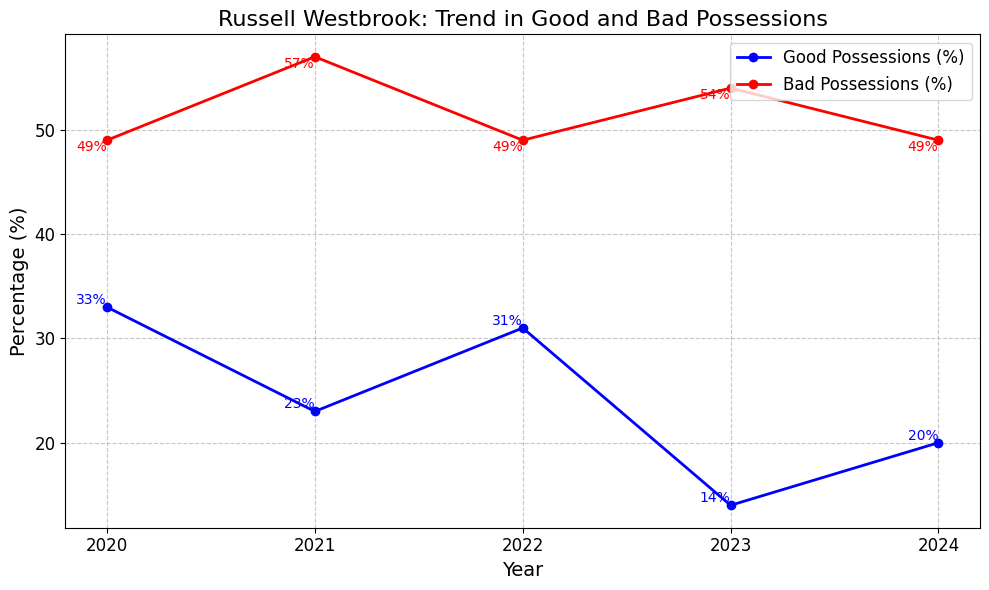

In [ ]:
import matplotlib.pyplot as plt

years = ['2020', '2021', '2022', '2023', '2024']
good_poss = [33, 23, 31, 14, 20]
bad_poss = [49, 57, 49, 54, 49]

plt.figure(figsize=(10, 6))

plt.plot(years, good_poss, marker='o', linestyle='-', color='b', label='Good Possessions (%)', linewidth=2)

plt.plot(years, bad_poss, marker='o', linestyle='-', color='r', label='Bad Possessions (%)', linewidth=2)

plt.title('Russell Westbrook: Trend in Good and Bad Possessions', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)

plt.xticks(years, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(loc='upper right', fontsize=12)

for i, year in enumerate(years):
    plt.text(years[i], good_poss[i], f'{good_poss[i]}%', ha='right', va='bottom', fontsize=10, color='b')
    plt.text(years[i], bad_poss[i], f'{bad_poss[i]}%', ha='right', va='top', fontsize=10, color='r')

plt.tight_layout()

plt.show()
